In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import defaultdict

In [2]:
# DA = 'data analyst'
# DS = 'data scientist'
# DE = 'data engineer'

# South Africa
sa_DA = pd.read_csv("sa_DA.csv")
sa_DS = pd.read_csv("sa_DS.csv")
sa_DE = pd.read_csv("sa_DE.csv")

# United States
us_DA = pd.read_csv("us_DA.csv")
us_DS = pd.read_csv("us_DS.csv")
us_DE = pd.read_csv("us_DE.csv")

# United Kingdom
uk_DA = pd.read_csv("uk_DA.csv")
uk_DS = pd.read_csv("uk_DS.csv")
uk_DE = pd.read_csv("uk_DE.csv")

# Australia
au_DA = pd.read_csv("au_DA.csv")
au_DS = pd.read_csv("au_DS.csv")
au_DE = pd.read_csv("au_DE.csv")

dataframes = [sa_DA, sa_DS, sa_DE,
              us_DA, us_DS, us_DE,
              uk_DA, uk_DS, uk_DE,
              au_DA, au_DS, au_DE]

In [3]:
# unfortunately the data from a glassdoor search quuery has duplicate job listings
# need to drop duplictate jobs: (job description is the best identifier)
counter = 0
for df in dataframes:
    if counter == 0: print("SA") 
    if counter == 3: print("\nUS")
    if counter == 6: print("\nUK")
    if counter == 9: print("\nAU")
    counter += 1
    print(str(counter)+": ",len(df["Job Description"]),"(original)",
          len(df.drop_duplicates(subset="Job Description")),"(dropped)")

SA
1:  78 (original) 76 (dropped)
2:  220 (original) 214 (dropped)
3:  790 (original) 709 (dropped)

US
4:  1000 (original) 720 (dropped)
5:  1000 (original) 673 (dropped)
6:  800 (original) 551 (dropped)

UK
7:  785 (original) 646 (dropped)
8:  1000 (original) 699 (dropped)
9:  800 (original) 622 (dropped)

AU
10:  1000 (original) 160 (dropped)
11:  468 (original) 168 (dropped)
12:  800 (original) 157 (dropped)


In [4]:
for df in dataframes:
    df.drop_duplicates(subset="Job Description", inplace=True)

In [5]:
# drop rows with nan values:
for df in dataframes:
    df = df.dropna(inplace = True)

In [6]:
# remove new line chars from job descriptions, company name
for df in dataframes:
    df["Job Description"] = df["Job Description"].str.replace("\n", " ")
    df["Company Name"] = df["Company Name"].str.replace("\n", " ")

In [7]:
# for the 'data engineer' search term, many software engineering and other jobs,
# not directly related to data science where scraped, need to drop these from df's
for df in dataframes:
    df = df[df["Job Title"].str.contains('|'.join(["Data", "data"]))]

In [8]:
techs = ["Python", "R", "Julia", "Java", "C", "Scala", "Bash", "PowerBi", "Tableau", "Excel", "VBA", "Macros","Alteryx", 
         "Spotfire", "Qlik", "Looker", "SAS", "ERP", "SAP", "MS Navision", "SAGE", "AccPac", "SQL", "Sql", "NoSql", "NoSQL", 
         "MongoDB", "Postgres", "PostgreSQL", "mySQL", "XML", "HTML", "CSS", "Javascript", "Hadoop", "Spark", "PySpark", 
         "SparkR", "Kafka", "ETL", "Oracle", "Storm", "AWS", "Cassandra", "Azkaban", "Airflow", "Luigi", "MATLAB", 
         "Snowflake", "BigQuery", "Azure", "GCP", "Perl", "Presto", "HBase", "Hive", "Druid", "Docker", "TensorFlow"]
pattern = "|".join(r"\b{}\b".format(x) for x in techs)

In [9]:
for df in dataframes:
    df["Technologies"] = df["Job Description"].str.findall(pattern, flags=re.I).str.join(", ").replace("", "Not found")

In [12]:
def get_degree_level(df):
    """
    Degree level
    """
 
    result = []
    for row in df["Job Description"]:
        try:
            jd = row.split(" ")
            if "bachelors" in map(lambda x: x.lower(), jd):
                result.append(["bachelors"])
            elif "Bachelors" in map(lambda x: x.lower(), jd):
                result.append(["bachelors"])
            elif "bachelor" in map(lambda x: x.lower(), jd):
                result.append(["bachelors"])
            elif "Bachelor" in map(lambda x: x.lower(), jd):
                result.append(["bachelors"])
            elif "bachelor's" in map(lambda x: x.lower(), jd):
                result.append(["bachelors"])
            elif "Bachelor's" in map(lambda x: x.lower(), jd):
                result.append(["bachelors"])
            if "master's" in map(lambda x: x.lower(), jd):   
                result.append(["masters"])
            elif "Master's" in map(lambda x: x.lower(), jd):                       
                result.append(["masters"])
            elif "masters" in map(lambda x: x.lower(), jd):                       
                result.append(["masters"])
            elif "Masters" in map(lambda x: x.lower(), jd):                       
                result.append(["masters"])
            if "phd" in map(lambda x: x.lower(), jd):
                result.append(["phd"])
            elif "Phd" in map(lambda x: x.lower(), jd):
                result.append(["phd"])
            elif "Ph.D" in map(lambda x: x.lower(), jd):
                result.append(["phd"])
            elif "PH.D" in map(lambda x: x.lower(), jd):
                result.append(["phd"])
            elif "doctorate" in map(lambda x: x.lower(), jd):
                result.append(["phd"])
            else: continue
                
        except: continue
            
    return result

In [13]:
def get_degree_major(df):
    """
    Degree major (type)
    """
    
    # refine this list + add two word majors
    majors_short = ["quantititive", "IT", "engineering", "marketing", "business", "commerce", 
                    "statistics", "maths", "mathematics", "physics", "chemistry", "epidemiology"]
    majors_long = ["computer", "data"]
    DTEST = defaultdict(int)
    result = []
    
    for row in df["Job Description"]:
        try:
            if "degree" in row.lower():
                subset = row.split("degree")[1]
                for major in majors_short:
                    if major in subset:
                        result.append(major)
        
        except: continue
            
    return result

## Part A: Job Title Insights

In [14]:
def plotTechCount(df): 
    """
    Counts and plots "Technologies"
    """
    tech_count = defaultdict(int)
    for item in df["Technologies"]:
        names = item.split(", ")
        for name in names:
            tech_count[name] += 1
    
    tech_count_sorted = {k: v for k, v in sorted(tech_count.items(), key=lambda item: item[1], reverse=True)}
    keys = list(tech_count_sorted.keys())
    values = [tech_count_sorted[k] for k in keys]
    
    sns.set_style("darkgrid")
    sns.barplot(x=keys[:30], y=values[:30]).set_xticklabels(labels = keys[:30], rotation=70)
    plt.xlabel("Top 30 Tools", size = 12)
    plt.ylabel("Count", size = 12)

In [15]:
def plotDegreeType(df): 
    """
    Plots degree types
    """
    
    deg_type_count = defaultdict(int)
    for word in get_degree_major(df):
        deg_type_count[word] += 1

    deg_type_count_sort = {k: v for k, v in sorted(deg_type_count.items(), key=lambda item: item[1], reverse=True)}
    
    keys = list(deg_type_count_sort.keys())
    vals = [deg_type_count_sort[k] for k in keys]
    sns.barplot(x = keys, y = vals).set_xticklabels(labels = keys, rotation= 45)
    plt.xlabel("Type", size = 12)
    plt.ylabel("Count", size = 12)
    plt.title("Common Degree Types:", size=16);

In [16]:
def plotDegreeLevel(df): 
    """
    Plots degree levels
    """
    
    deg_level_count = defaultdict(int)

    for l in get_degree_level(df):
        for word in l:
            deg_level_count[word] += 1

    deg_level_count_sort = {k: v for k, v in sorted(deg_level_count.items(), key=lambda item: item[1], reverse=True)}
    
    keys = list(deg_level_count_sort.keys())
    vals = [deg_level_count_sort[k] for k in keys]
    sns.barplot(x = keys, y = vals).set_xticklabels(labels = keys, rotation= 45)
    plt.xlabel("Level", size = 12)
    plt.ylabel("Count", size = 12)
    plt.title("Degree Level:", size=16);

In [17]:
for df in dataframes:
    df = df[df["Job Title"].str.contains('|'.join(["Data", "data"]))]

### i. Data Analyst

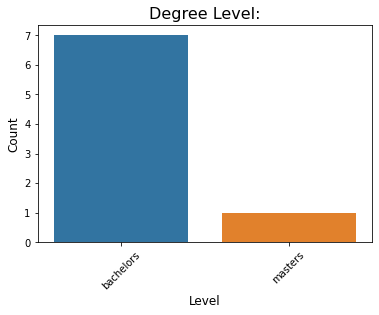

In [21]:
#### Degree Levels for Different Roles:
# use 3 (each title) x 4 (subpots for each country)
plotDegreeLevel(sa_DA)

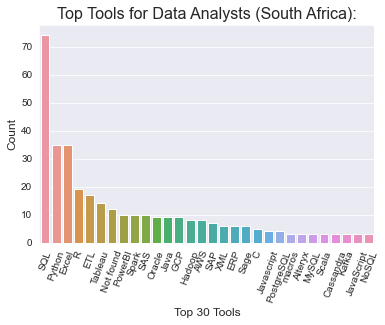

In [22]:
# remove "Not found"
plotTechCount(sa_DA)
plt.title("Top Tools for Data Analysts (South Africa):", size=16);

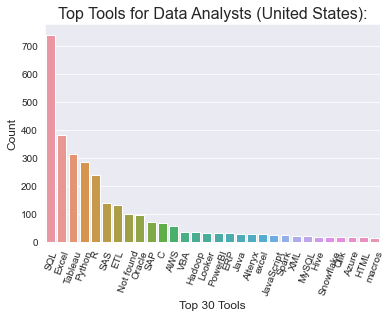

In [23]:
plotTechCount(us_DA)
plt.title("Top Tools for Data Analysts (United States):", size=16);

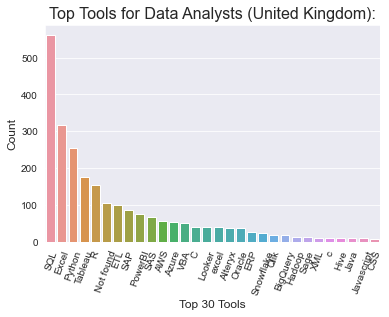

In [24]:
plotTechCount(uk_DA)
plt.title("Top Tools for Data Analysts (United Kingdom):", size=16);

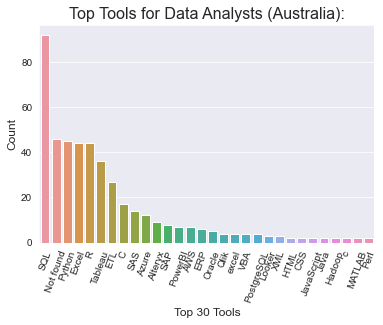

In [25]:
plotTechCount(au_DA)
plt.title("Top Tools for Data Analysts (Australia):", size=16);

For data analysts, the most in demand skills across all 4 countries are **SQL, R, Python, Excel, Tableau**. Interestingly, Tableau seems to be significanly more favoured than Power BI as a visualisation tool. This is interesting since Power BI desktop is free contains full functionality whereas Tableau desktop is more limited. Perhaps most companies have invested the capital into Tableau software due to its highly regarded visualisation capabilities. ETL tools are also a common requirement. Big data technologies are not in high demand for this role.

### ii. Data Scientist

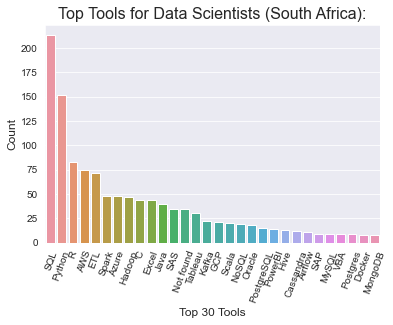

In [26]:
plotTechCount(sa_DS)
plt.title("Top Tools for Data Scientists (South Africa):", size=16);

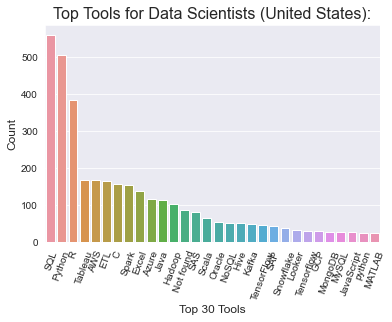

In [27]:
plotTechCount(us_DS)
plt.title("Top Tools for Data Scientists (United States):", size=16);

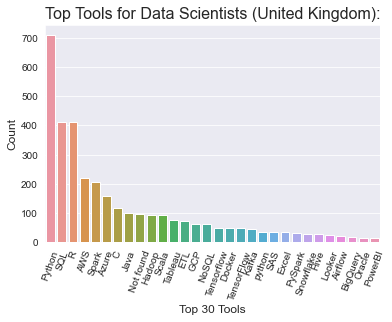

In [28]:
plotTechCount(uk_DS)
plt.title("Top Tools for Data Scientists (United Kingdom):", size=16);

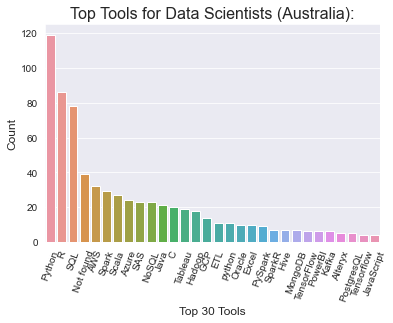

In [29]:
plotTechCount(au_DS)
plt.title("Top Tools for Data Scientists (Australia):", size=16);

**Python** appears to be favoured over **R** with R coming in second. Perhaps since Python is more of a general purpose programming language. **SQL** is a staple and other important technologies include **AWS, and big data technologies** are also key for data scientist roles across all 4 countries.

### iii. Data Engineer

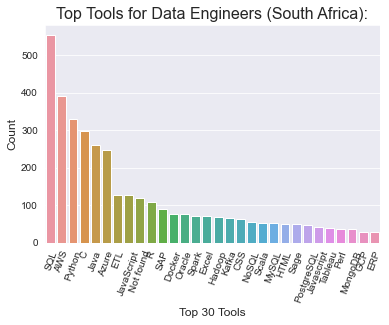

In [30]:
plotTechCount(sa_DE)
plt.title("Top Tools for Data Engineers (South Africa):", size=16);

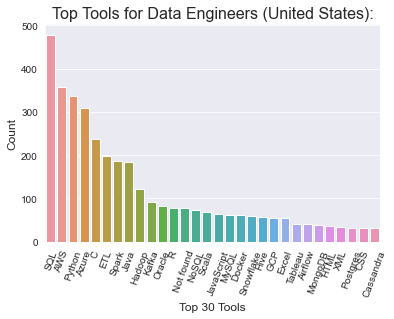

In [31]:
plotTechCount(us_DE)
plt.title("Top Tools for Data Engineers (United States):", size=16);

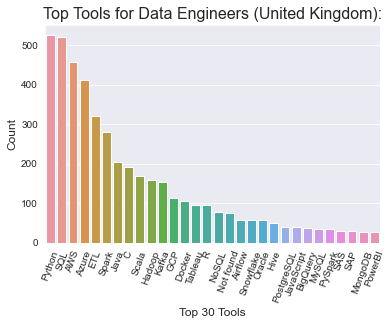

In [32]:
plotTechCount(uk_DE)
plt.title("Top Tools for Data Engineers (United Kingdom):", size=16);

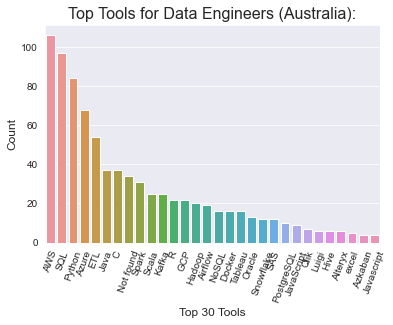

In [33]:
plotTechCount(au_DE)
plt.title("Top Tools for Data Engineers (Australia):", size=16);

**AWS, SQL, Python (also Java and C), Azure, ETL tools as well as other big data techs** are key for data engineering roles across all 4 countries.

## Part B: Location Insights

In [34]:
def plotJobLocation(df): 
    """
    Plots top 10 job posting locations
    """
    sns.catplot(data = df, x = "Location", kind = "count", 
                order=df["Location"].value_counts().iloc[:10].index).set_xticklabels(rotation=65)
    plt.xlabel("Location", size = 12)
    plt.ylabel("Count", size = 12)

### i. South Africa:

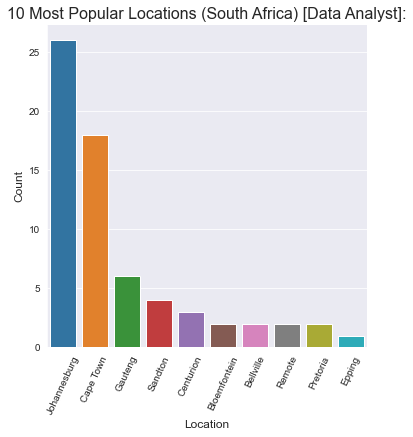

In [35]:
plotJobLocation(sa_DA)
plt.title("10 Most Popular Locations (South Africa) [Data Analyst]:", size=16);

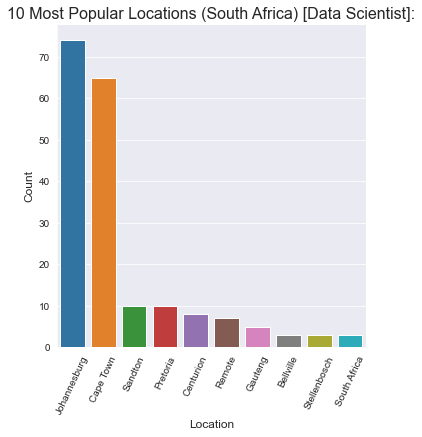

In [36]:
plotJobLocation(sa_DS)
plt.title("10 Most Popular Locations (South Africa) [Data Scientist]:", size=16);

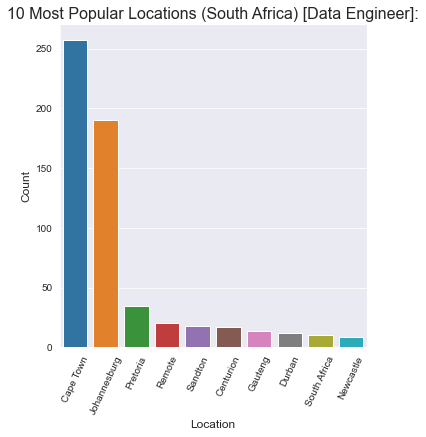

In [37]:
plotJobLocation(sa_DE)
plt.title("10 Most Popular Locations (South Africa) [Data Engineer]:", size=16);

For all 3 roles, most are found in **Cape Town** and **Johannesburg (Gauteng)**.

### ii. United States

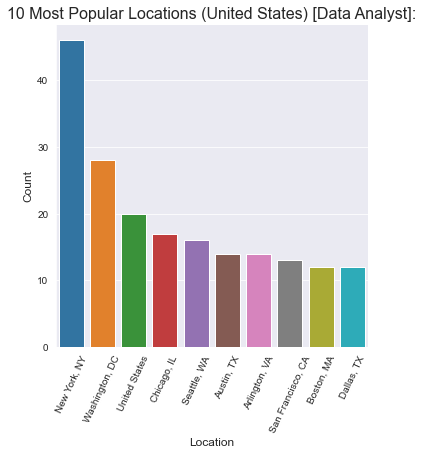

In [38]:
plotJobLocation(us_DA)
plt.title("10 Most Popular Locations (United States) [Data Analyst]:", size=16);

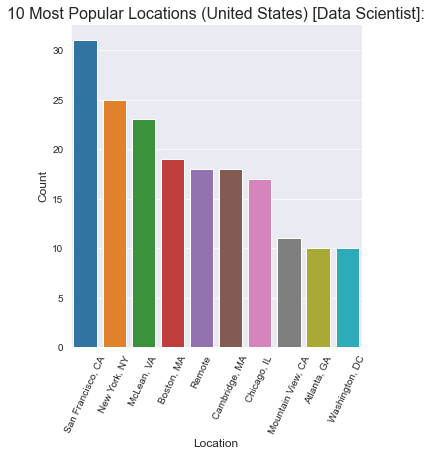

In [39]:
plotJobLocation(us_DS)
plt.title("10 Most Popular Locations (United States) [Data Scientist]:", size=16);

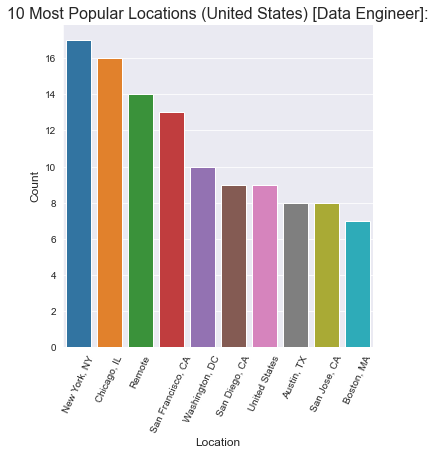

In [40]:
plotJobLocation(us_DE)
plt.title("10 Most Popular Locations (United States) [Data Engineer]:", size=16);

### iii. United Kingdom

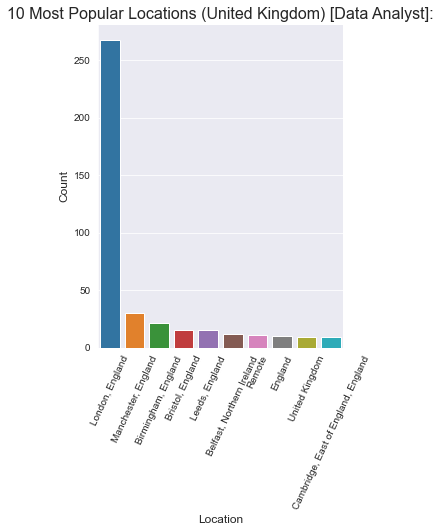

In [41]:
plotJobLocation(uk_DA)
plt.title("10 Most Popular Locations (United Kingdom) [Data Analyst]:", size=16);

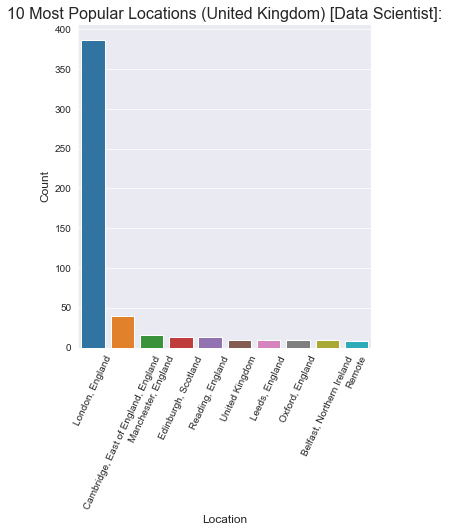

In [42]:
plotJobLocation(uk_DS)
plt.title("10 Most Popular Locations (United Kingdom) [Data Scientist]:", size=16);

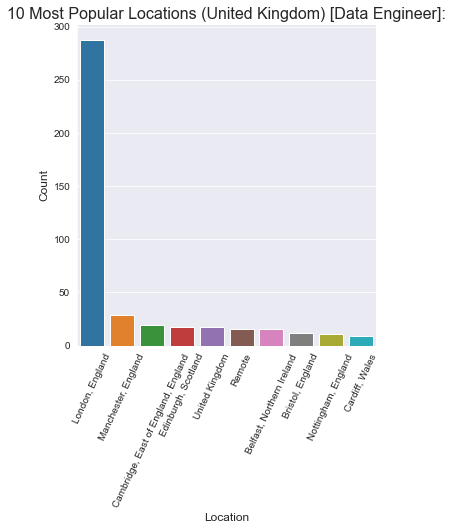

In [43]:
plotJobLocation(uk_DE)
plt.title("10 Most Popular Locations (United Kingdom) [Data Engineer]:", size=16);

### iv. Australia

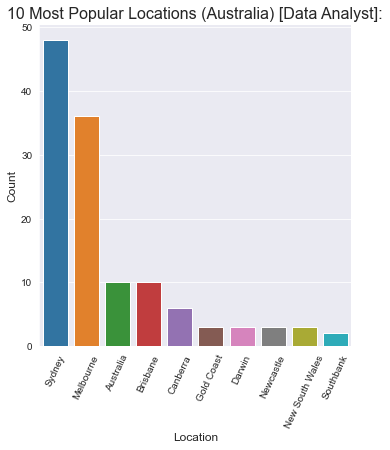

In [44]:
plotJobLocation(au_DA)
plt.title("10 Most Popular Locations (Australia) [Data Analyst]:", size=16);

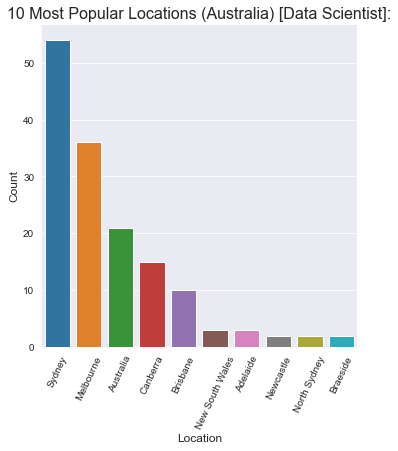

In [45]:
plotJobLocation(au_DS)
plt.title("10 Most Popular Locations (Australia) [Data Scientist]:", size=16);

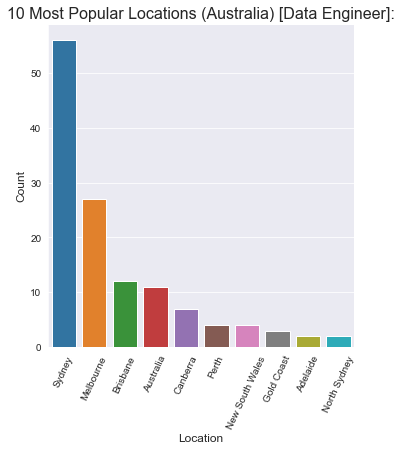

In [46]:
plotJobLocation(au_DE)
plt.title("10 Most Popular Locations (Australia) [Data Engineer]:", size=16);

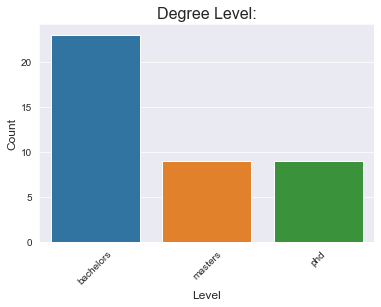

In [47]:
plotDegreeLevel(sa_DS)

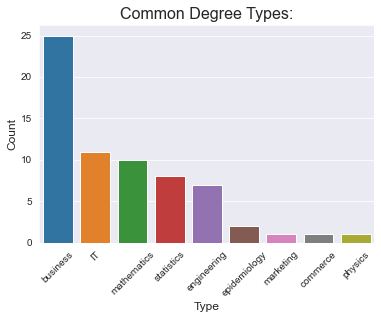

In [48]:
plotDegreeType(sa_DS)

### v. Combined